# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

## Read data and EDA

In [77]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
crops = pd.read_csv("soil_measures.csv")

crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [78]:
X = crops.iloc[:,:-1]
y = crops["crop"]

In [79]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [80]:
col_numeriacal = crops.select_dtypes(include=['float64', 'int64']).columns.tolist()
col_numeriacal

['N', 'P', 'K', 'ph']

In [81]:
crops['crop'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64

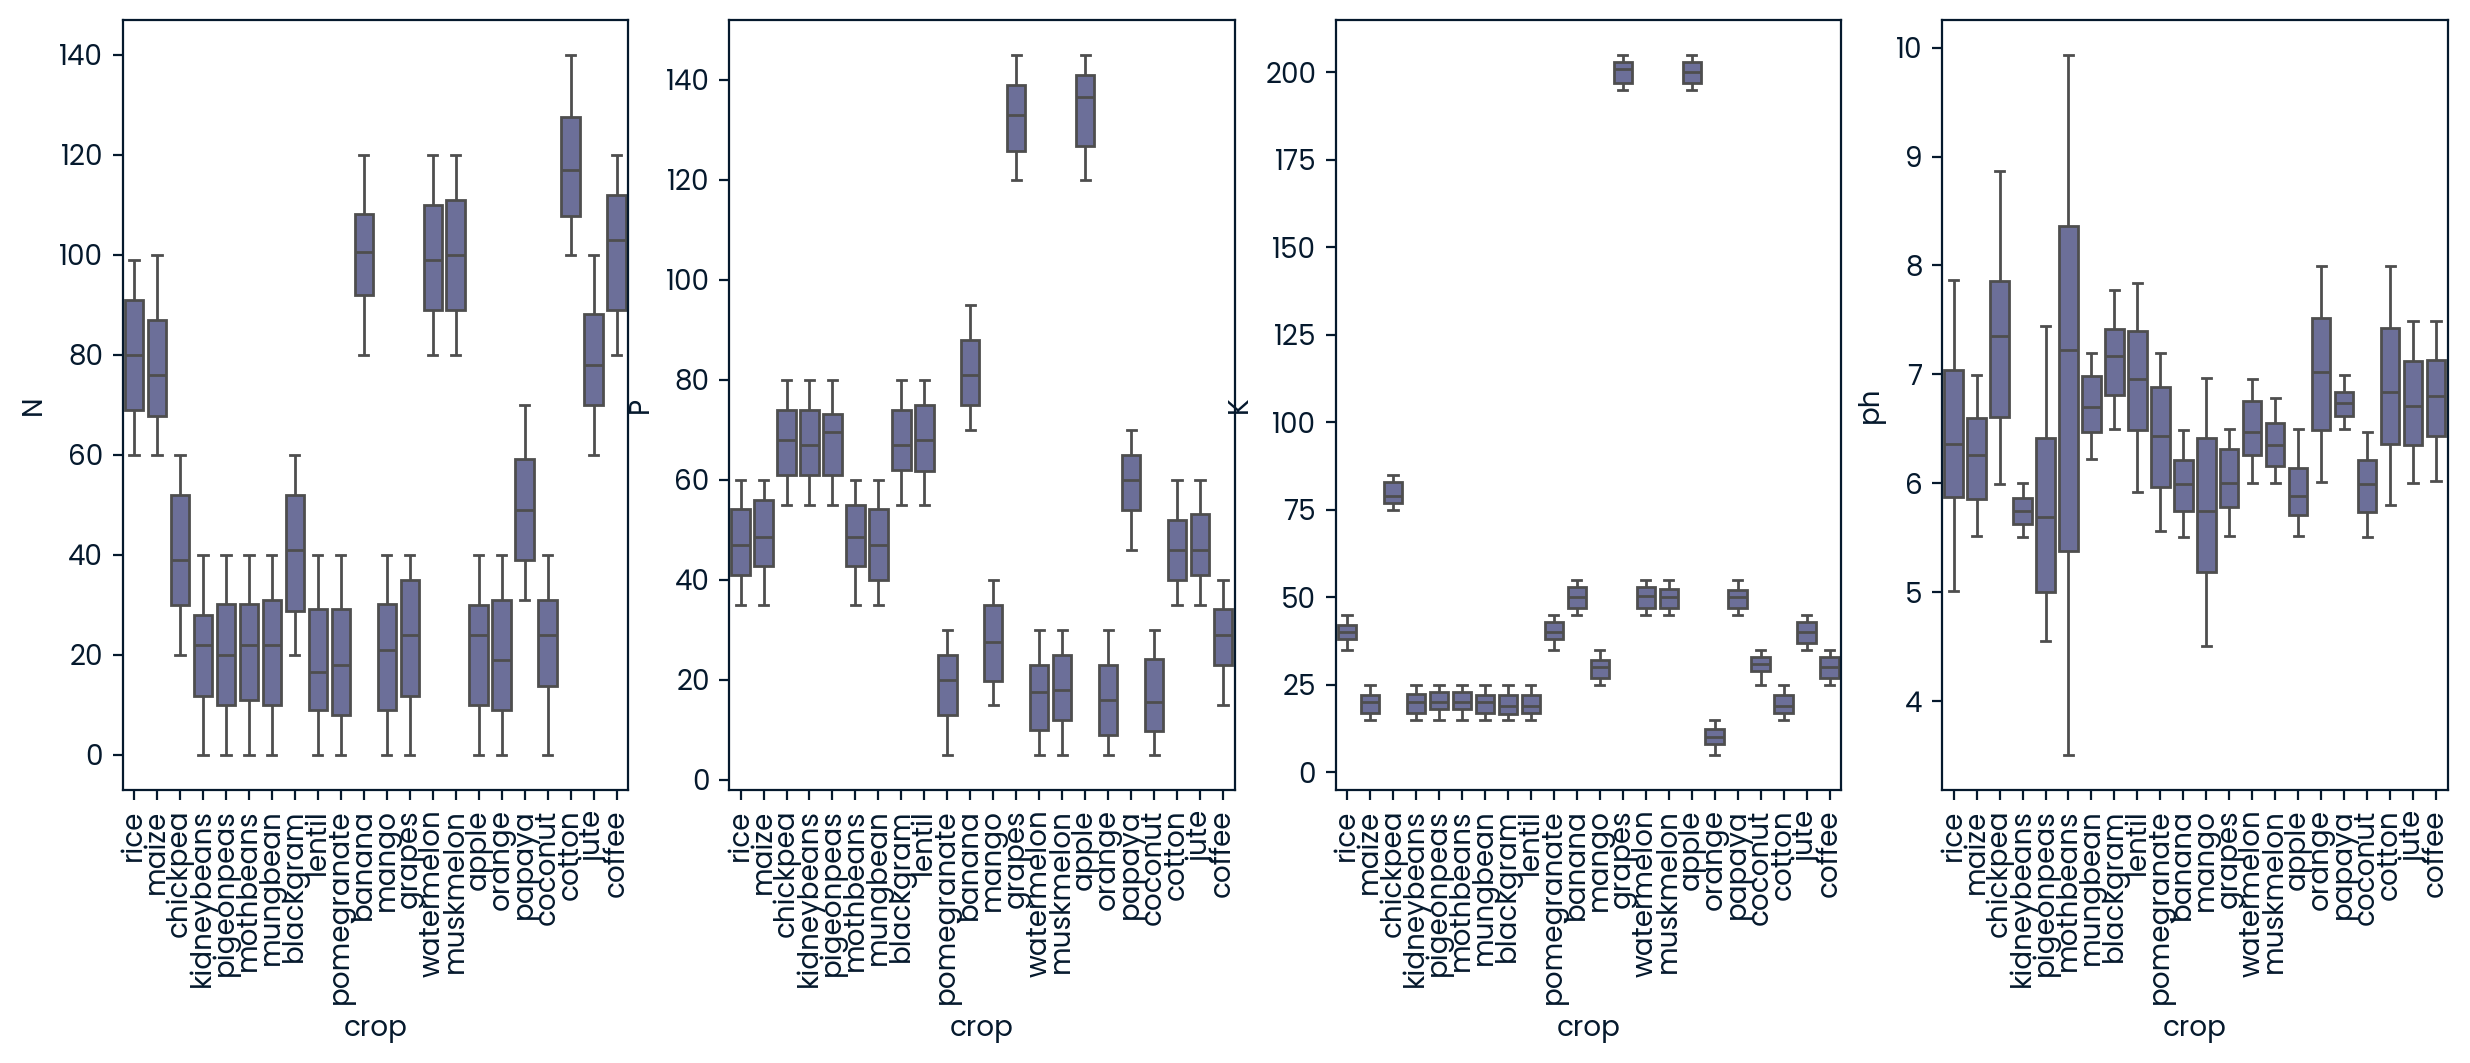

In [82]:
fig, ax = plt.subplots(1, len(col_numeriacal), figsize=(15, 5))  # Bạn có thể điều chỉnh kích thước
for i, col in enumerate(col_numeriacal):
    sns.boxplot(x="crop", y=col, data=crops, ax=ax[i])
    ax[i].tick_params(axis='x', rotation=90)

In [83]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y)
print(mi)

[0.99189124 1.3141422  1.62734834 0.68606703]


Find the feature in the dataset that produces the best score for predicting "crop"

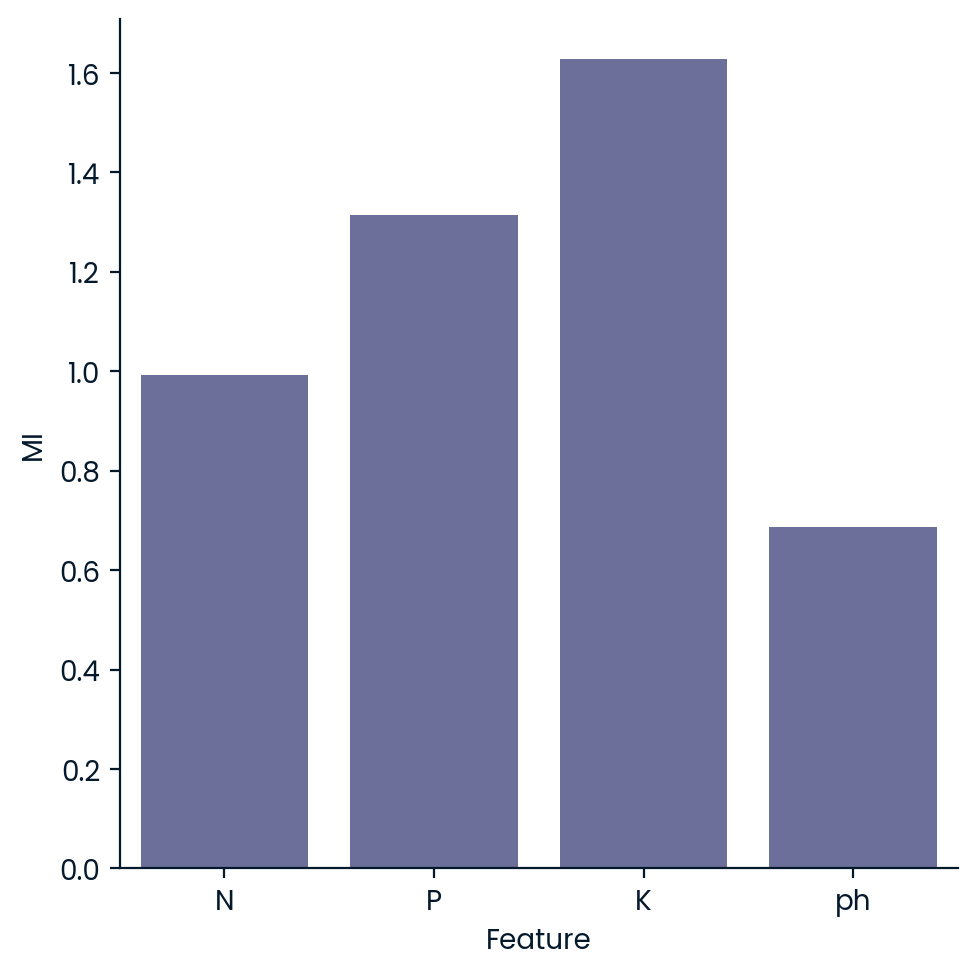

In [84]:
# Tạo DataFrame cho Mutual Information
mi_df = pd.DataFrame({"Feature": col_numeriacal, "MI": mi})
sns.catplot(data = mi_df, x="Feature", y="MI", kind="bar", ci=None)
plt.show()

## Split data

In [85]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y_encoded = le.fit_transform(y)

In [86]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1760, 4), (440, 4), (1760,), (440,))

### Evaluate feature performance

In [87]:
feature_scores = dict(zip(col_numeriacal, [0] * len(col_numeriacal)))

# Display the dictionary
feature_scores

{'N': 0, 'P': 0, 'K': 0, 'ph': 0}

### Using XG boost

In [88]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the XGBoost model for classification
model = XGBClassifier()

# Evaluate each feature individually
for feature in col_numeriacal:
    # Reshape the feature to fit the model
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]
    
    # Train the model
    model.fit(X_train_feature, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_feature)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Update the feature_scores dictionary
    feature_scores[feature] = accuracy

# Display the updated feature_scores dictionary
feature_scores

{'N': 0.1409090909090909,
 'P': 0.20454545454545456,
 'K': 0.3090909090909091,
 'ph': 0.13636363636363635}

In [89]:
# Find the feature with the highest accuracy score
best_feature = max(feature_scores, key=feature_scores.get)
best_score = feature_scores[best_feature]

# Store the best feature and its score in a dictionary
best_predictive_feature = {best_feature: best_score}

# Display the best_predictive_feature dictionary
best_predictive_feature

{'K': 0.3090909090909091}

### Using LogisticRegression

In [90]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Check for missing values
crops.isna().sum()

# Check how many crops we have, i.e., multi-class target
crops.crop.unique()

# Split into feature and target sets
X = crops.drop(columns="crop")
y = crops["crop"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Create a dictionary to store the model performance for each feature
feature_performance = {}

# Train a logistic regression model for each feature
for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(multi_class="multinomial")
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    
    # Tính Accuracy (độ chính xác)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    # Thêm cặp key-value (feature, accuracy) vào dictionary
    feature_performance[feature] = accuracy
    print(f"Accuracy for {feature}: {accuracy}")

# K produced the best accuracy score
# Lưu kết quả vào best_predictive_feature dictionary
best_predictive_feature = {"K": feature_performance["K"]}
best_predictive_feature

Accuracy for N: 0.13863636363636364
Accuracy for P: 0.20227272727272727
Accuracy for K: 0.2863636363636364
Accuracy for ph: 0.09772727272727273


{'K': 0.2863636363636364}